In [1]:
from coders import FeatureASK as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 10
gen_time = 180

[16844] Lock acquired: 1


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 751/507/259
Gen average time: 0:00:18.572347
Gen 2 grades: 972/873/528
Gen average time: 0:00:13.837366
Gen 3 grades: 762/606/352
Gen average time: 0:00:12.244923
Gen 4 grades: 1212/779/378
Gen average time: 0:00:12.118183
Gen 5 grades: 997/716/334
Gen average time: 0:00:11.933838
Gen 6 grades: 857/741/428
Gen average time: 0:00:09.868169
Gen 7 grades: 814/736/552
Gen average time: 0:00:09.391160
Gen 8 grades: 1127/833/582
Gen average time: 0:00:08.955863
Gen 9 grades: 1074/912/628
Gen average time: 0:00:07.943763
Gen 10 grades: 1048/896/587
Gen average time: 0:00:07.058547
Average run: 0:00:09.496192
Done in: 0:01:34.961925
Gen 11 grades: 0/0/0
Gen average time: 0:00:06.614346
Gen 12 grades: 933/187/47
Gen average time: 0:00:06.496708
Gen 13 grades: 978/196/49
Gen average time: 0:00:06.538988
Gen 14 grades: 0/0/0
Gen average time: 0:00:06.527550
Gen 15 grades: 1047/574/143
Gen average time: 0:00:06.583979
Gen 16 grades: 1047/909/261
Gen average time: 0:00:06.933548
Gen 1

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

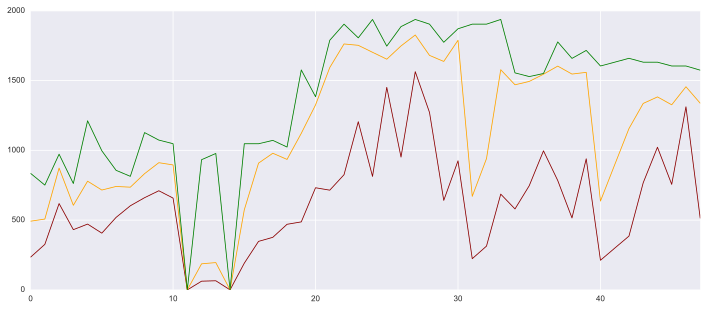

In [5]:
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')

In [6]:
for c in population._sort(10000)[:3]:
    print(*coder_fitness(0)(c, raw=True))
    print(c)

1684.2105263157894 0.9833333333333333
FeatureASK:
    high_amplitude: 0.882858136119901
    filter_type: 1
    filter_window_base: 19
    d_high_amplitude: 0.6044044074428315
    peak_threshold: 0.47766797605401756
    sqe_end: 0.11913837478353775
    filter_std_scale: 0.1456659563637011
    peak_width_span: 0.7212365509223295
    filter_shape: 0.10215887228019055
    sqe_start: 0.6515847881314072
    filter_window_scale: 0.1471013023832713
    filter_std_base: 13
    sqe_end_v: 0.7459880104608634
    frequency: 1793
    low_amplitude: 0.15583524307762647
    symbol_duration: 0.0005965222535301615
    d_low_amplitude: 0.8487249246994043
    amplitude: 0.8973235836051554
    peak_width_start: 0.4641756012760843
    sqe_start_v: 0.30882127647957414
    symbol_width: 1
    rate: 96000
1352.1126760563382 0.9833333333333333
FeatureASK:
    high_amplitude: 0.7619562071440198
    filter_type: 1
    filter_window_base: 8
    d_high_amplitude: 0.7010815439089055
    peak_threshold: 0.5301744459